# Plotbot Audification Examples 🔊🌞

## Parker Solar Probe Encounter 8 - Wave-Particle Interactions Audification

This notebook demonstrates how to create audio representations of Parker Solar Probe magnetic field data. This specific time regions includes wave-particle interactions occurring upstream of a Heliospheric Current Sheet (HCS) crossing during Encounter 8. The audification process converts time series data into audio, allowing us to "hear" these complex plasma dynamics and magnetic field variations.

### Event Details 🌌
- **Encounter 8**: April 29, 2021 (07:45 - 08:20 UTC)
- **Phenomenon**: Wave-particle interactions upstream of HCS crossing
- **Data Source**: Jaye's E8 Region analysis
- **Significance**: Audio reveals plasma physics processes in the solar wind


In [1]:
# Import plotbot and initialize
from plotbot import *
import numpy as np
from datetime import datetime, timedelta

# 📁 DATA DIRECTORY CONFIGURATION
# Point plotbot to the main project's data directory
import os

# Step 1: Get current directory (example_notebooks/)
current_dir = os.getcwd()

# Step 2: Get parent directory (main Plotbot project folder)  
parent_dir = os.path.dirname(current_dir)

# Step 3: Point to main data folder: /path/to/Plotbot/data/
main_data_dir = os.path.join(parent_dir, 'data')

# Step 4: Configure plotbot to use main data directory instead of creating ./data/
config.data_dir = main_data_dir

print(f"📁 Data directory configured: {config.data_dir}")
print(f"   (instead of creating data/ in the default location: {current_dir})")



🕒 Starting import timing session: plotbot_full_initialization
  ✅ matplotlib.pyplot: 0.328s
  ✅ numpy: 0.000s
  🔧 Starting block: core_components
initialized server_access
initialized global_tracker
initialized ploptions
initialized plot_manager
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized ham_class
initialized psp_alpha class
initialized psp_qtn class
initialized psp_orbit class
initialized psp_span_vdf class
initialized data_cubby.
CDF classes added to data_cubby type map.
  ✅ Block 'core_components' completed in 0.995s
  🔧 Starting block: psp_data_classes
initialized proton_fits class
initialized alpha_fits class
  ✅ Block 'psp_data_classes' completed in 0.002s
  🔧 Starting block: wind_data_classes
  ✅ Block 'wind_data_classes' completed in 0.000s
  🔧 Starting block: data_cubby_registration
  ✅ Block 'data_cubby_registration' completed in 0.001s
  🔧 Starting block: auto_register_custom_classes
  ✅ Block 'auto_regi

In [2]:
# ------- 💽 CONFIGURE THE DEFAULT DATA DIRECTORY 💽 -------//
# This must be set before pyspedas is imported/run, as pyspedas caches configuration at import time.

config.data_dir = '../data'  # Go up one level to Plotbot/data/

import os
print(f"📁 Data directory absolute path: {os.path.abspath(config.data_dir)}")

# ------- 📡 CONFIGURE THE DEFAULT DATA SERVER 📡 -------//

config.data_server = 'berkeley'
# config.data_server = 'spdf'
# config.data_server = 'dynamic' #Will attempt to download from spdf first and then try berkeley

# ------- 🖨️ CONFIGURE PRINT MANAGER 🖨️ -------//
print_manager.show_status = True
# pm.show_debug = True      # Optional: uncomment for maximum detail
# pm.show_processing = True # Optional: uncomment for processing steps
# pm.show_datacubby = True  # Optional: uncomment for data caching steps


📁 Plotbot data directory changed: /Users/robertalexander/GitHub/Plotbot/data → ../data
🔧 SPEDAS_DATA_DIR updated for pyspedas compatibility
📁 Data directory absolute path: /Users/robertalexander/GitHub/Plotbot/data


## 🔧 Audifier Setup and Configuration

First, we'll configure the audifier with optimal settings for perihelion data analysis.


In [3]:
# Configure save directory for audio files
SET_NEW_SAVE_DIRECTORY = False  # Set to True to choose a new save directory
audifier.select_save_dir(force_new=SET_NEW_SAVE_DIRECTORY)
print()


Using previously set save directory: /Users/robertalexander/GitHub/Plotbot/audio_files


Button(button_style='info', description='Open Save Directory', style=ButtonStyle(), tooltip='Click to open the…

In [4]:
print_manager.show_status = True

In [5]:
# Optionally change markers per hour from default 120
audifier.markers_per_hour = 6  # 1 marker every 10 seconds = 360 markers per hour,
audifier.markers_only = False  # Default setting
audifier.quantize_markers = True  # hourly
audifier.sample_rate = 22000 # Or try 16000 to slow down playback

audifier.channels = 1

# trange = ['2024-09-27/05:15.000', '2024-10-03/05:15.000']  # Enc 21

# trange = ['2025-03-23/17:30:00.000', '2025-03-23/18:30:00.000']  # Enc 23 Flapping Proof?
# trange = ['2025-03-23 17:56:00.000', '2025-03-23 18:06:00.000']  # Enc 23 Flapping Proof Zoom
# trange = ['2021/04/29 07:45:00.000', '2021/04/29 08:20:00.000'] # Jaye's E8 Region
# trange = ['2021/04/28 07:45:00.000', '2021/04/28 08:20:00.000'] # Jaye's E8 Region
trange = ['2023/06/22 05:45:00.000', '2023/06/22 06:15:00.000'] # 
# trange = ['2025/06/16 09:31:00.000', '2025/06/22 09:31:00.000']  # Enc 24 perihelion +/- 3 days


print(trange)
print(f"🔊 Audifier configured:")
print(f"   Markers per hour: {audifier.markers_per_hour}")
print(f"   Sample rate: {audifier.sample_rate} Hz")
print(f"   Channels: {audifier.channels}")
print(f"   Markers only: {audifier.markers_only}")


# Create audio files and markers from any components
# audifier.audify(trange, mag_rtn_4sa.br, mag_rtn_4sa.bt, mag_rtn_4sa.bn, mag_rtn_4sa.bmag)
# plotbot(trange, mag_rtn.br, 1, mag_rtn.bt, 2, mag_rtn.bn, 3, mag_rtn.bmag, 4)
audifier.audify(trange, mag_rtn.br, mag_rtn.bt, mag_rtn.bn, mag_rtn.bmag)


['2023/06/22 05:45:00.000', '2023/06/22 06:15:00.000']
🔊 Audifier configured:
   Markers per hour: 6
   Sample rate: 22000 Hz
   Channels: 1
   Markers only: False
Starting audification process...
🕒 TimeRangeTracker: Stored trange ['2023/06/22 05:45:00.000', '2023/06/22 06:15:00.000']
📡 mag_RTN - Local .cdf files already exist:
📂 ../data/psp/fields/l2/mag_rtn/2023/psp_fld_l2_mag_RTN_2023062200_v02.cdf, ../data/psp/fields/l2/mag_rtn/2023/psp_fld_l2_mag_RTN_2023062206_v02.cdf
☑️ - CDF Data import complete for mag_RTN range ['2023/06/22 05:45:00', '2023/06/22 06:15:00'].

📡 mag_RTN - Local .cdf files already exist:
📂 ../data/psp/fields/l2/mag_rtn/2023/psp_fld_l2_mag_RTN_2023062200_v02.cdf, ../data/psp/fields/l2/mag_rtn/2023/psp_fld_l2_mag_RTN_2023062206_v02.cdf
📡 mag_RTN - Local .cdf files already exist:
📂 ../data/psp/fields/l2/mag_rtn/2023/psp_fld_l2_mag_RTN_2023062200_v02.cdf, ../data/psp/fields/l2/mag_rtn/2023/psp_fld_l2_mag_RTN_2023062206_v02.cdf
📡 mag_RTN - Local .cdf files already e

Button(description='Show Directory', style=ButtonStyle())

Button(description='Open markers', style=ButtonStyle())

Button(description='Open br', style=ButtonStyle())

Button(description='Open bt', style=ButtonStyle())

Button(description='Open bn', style=ButtonStyle())

Button(description='Open bmag', style=ButtonStyle())

{'markers': '/Users/robertalexander/GitHub/Plotbot/audio_files/E16/E16_2023_06_22_0545_to_0615/E16_PSP_FIELDS_MARKER_SET_2023-06-22_0545_to_0615_6_per_hour.txt',
 'br': '/Users/robertalexander/GitHub/Plotbot/audio_files/E16/E16_2023_06_22_0545_to_0615/E16_PSP_MAG_RTN_2023-06-22_0545_to_0615_22000SR_Br.wav',
 'bt': '/Users/robertalexander/GitHub/Plotbot/audio_files/E16/E16_2023_06_22_0545_to_0615/E16_PSP_MAG_RTN_2023-06-22_0545_to_0615_22000SR_Bt.wav',
 'bn': '/Users/robertalexander/GitHub/Plotbot/audio_files/E16/E16_2023_06_22_0545_to_0615/E16_PSP_MAG_RTN_2023-06-22_0545_to_0615_22000SR_Bn.wav',
 'bmag': '/Users/robertalexander/GitHub/Plotbot/audio_files/E16/E16_2023_06_22_0545_to_0615/E16_PSP_MAG_RTN_2023-06-22_0545_to_0615_22000SR_Bmag.wav'}

🚀 vdyes() - Processing trange: ['2023/06/22 05:45:00.000', '2023/06/22 06:15:00.000']
📡 Downloading PSP SPAN-I data using proven pyspedas approach...
📡 Checking/downloading VDF files with proper filtering...
📁 Downloaded: /Users/robertalexander/GitHub/Plotbot/data/psp/sweap/spi/l2/spi_sf00_8dx32ex8a/2023/psp_swp_spi_sf00_l2_8dx32ex8a_20230622_v04.cdf
📊 Found 1030 time points in trange: ['2023/06/22 05:45:00.000', '2023/06/22 06:15:00.000']
🎛️ Widget mode: 1030 time points → interactive time slider
🎛️ Creating VDF widget with 1030 time points...
🔗 Button handlers connected successfully
✅ VDF widget created! 1030 time points available
   Time range: 2023-06-22 05:45:01.651217 to 2023-06-22 06:14:59.967762
   💾 Save location: Current directory (/Users/robertalexander/GitHub/Plotbot/example_notebooks) - Use 'Change Save Directory' to modify


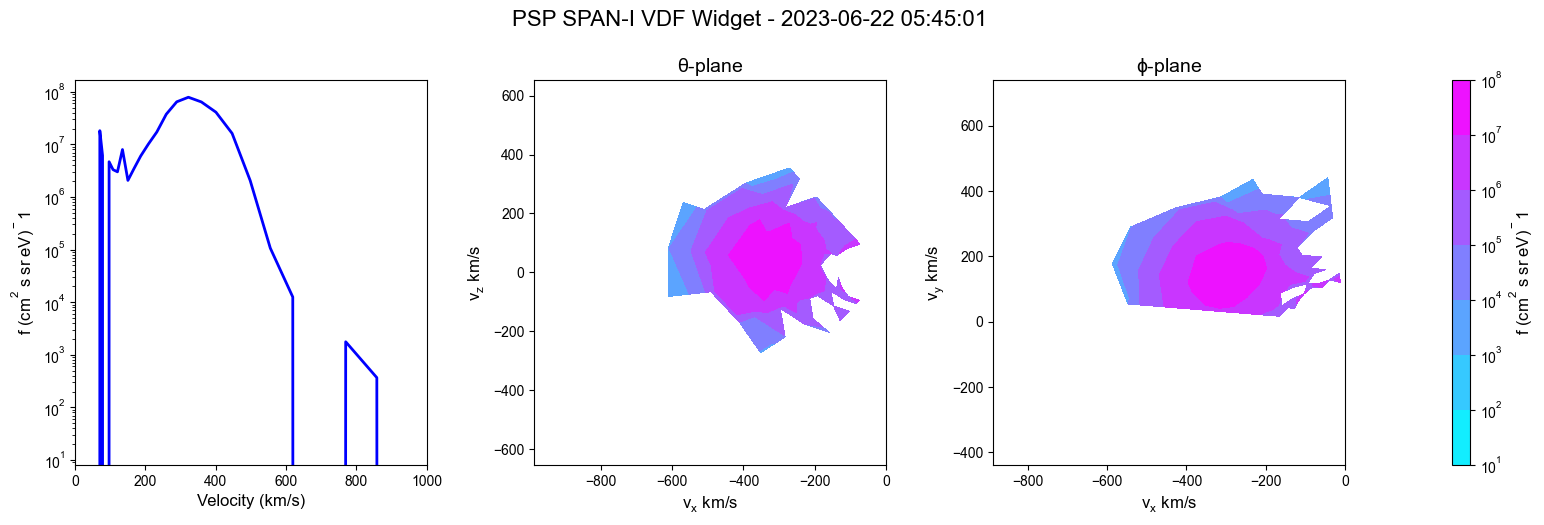

In [6]:
# Configure smart bounds
psp_span_vdf.enable_smart_padding = True
psp_span_vdf.theta_smart_padding = 300     # Square, zero-centered theta
psp_span_vdf.phi_x_smart_padding = 300     # Phi paddings around peak
psp_span_vdf.phi_y_smart_padding = 300
psp_span_vdf.phi_peak_centered = True      # Center phi on density peak
psp_span_vdf.enable_zero_clipping = True   # Clamp X at zero when one-sided
psp_span_vdf.vdf_colormap = 'cool'

vdyes(trange)